<a href="https://colab.research.google.com/github/12345997/Financial-dataset/blob/main/WEEK_6_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fifa dataset configuration

#1.0 Defining the question

## Specifying the Data Analytic Question



```

#What team had the most wins generally on either away game or home game
#what team had the lost the most on either home or away game
```



###Defining the metric of success



```
#To find the probability that a team will win a home game or an away game
```



###Data relevance

the aim of this project is to predic the probability of anaway or a home team winning a game

#2.0 Importing the Libraries

In [ ]:
# Importing the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt



#3.0 Loading the data

In [ ]:
#Reading the data into our environmet
results=pd.read_csv("results.csv")

In [ ]:
#Reading the data into our environmet
fifa_ranking=pd.read_csv("/content/fifa_ranking.csv")

#4.0 Previewing the dataset

In [ ]:
#checking the number of records
fifa_ranking.shape

(57793, 16)

In [ ]:
#checking the number of records
fifa_ranking.shape

(57793, 16)

In [ ]:
#previewing the first five records
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#previewing  the last five records
results.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#previewing the last five records
fifa_ranking.tail(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
#checking the datatypes in each column
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
#checking the datatypes in each column
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
#Checking the data's info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# Changing the columns to lower case
fifa_ranking.columns = fifa_ranking.columns.str.lower()
fifa_ranking.head(0)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date


In [ ]:
#Fifa_data = Fifa_data.rename(columns={'country_full':'country'},axis=1, inplace=True)
fifa_ranking.rename(columns = {'country_full' : "country"},inplace=True)

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Place the DataFrames side by side
Fifa_results = pd.concat([fifa_ranking, results], axis=1)

In [ ]:
##Previewing our new data
Fifa_results.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [ ]:
Fifa_results.drop(["country","country_abrv"], axis=1, inplace=True)

#5.0 Data Preparation

###Checking for null values

In [ ]:
Fifa_results.isnull().any()

rank                       False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
date                        True
home_team                   True
away_team                   True
home_score                  True
away_score                  True
tournament                  True
city                        True
neutral                     True
dtype: bool

In [ ]:
Fifa_results.isnull().sum()

rank                           0
total_points                   0
previous_points                0
rank_change                    0
cur_year_avg                   0
cur_year_avg_weighted          0
last_year_avg                  0
last_year_avg_weighted         0
two_year_ago_avg               0
two_year_ago_weighted          0
three_year_ago_avg             0
three_year_ago_weighted        0
confederation                  0
rank_date                      0
date                       16954
home_team                  16954
away_team                  16954
home_score                 16954
away_score                 16954
tournament                 16954
city                       16954
neutral                    16954
dtype: int64

In [ ]:
Fifa_results.dtypes

rank                         int64
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
date                        object
home_team                   object
away_team                   object
home_score                 float64
away_score                 float64
tournament                  object
city                        object
neutral                     object
dtype: object

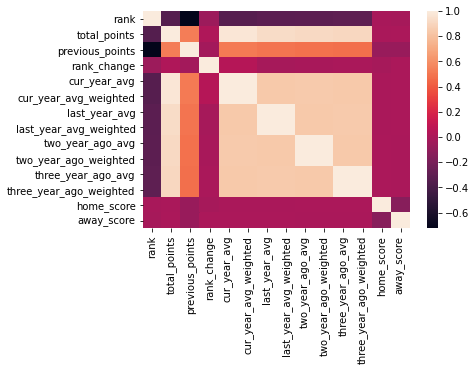

In [ ]:
import seaborn as sb
sb.heatmap(Fifa_results.corr()) 

In [ ]:
Fifa_results.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,40839.000000,40839.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811,1.745709,1.188105
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675,1.749145,1.405120
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000,2.000000,2.000000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000,31.000000,21.000000


###Checking for duplicates

In [ ]:
# Checking if our data contains any duplicate values
Fifa_results.duplicated().sum()

214

In [ ]:
#droping the duplicates inour data
Fifa_results.drop_duplicates()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,0.00,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,UEFA,1993-08-08,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,False
1,2,0.00,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,UEFA,1993-08-08,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,False
2,3,0.00,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,UEFA,1993-08-08,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,False
3,4,0.00,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,UEFA,1993-08-08,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,False
4,5,0.00,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CONMEBOL,1993-08-08,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57786,204,4.25,17,-4,0.0,0.0,0.0,0.0,0.0,0.0,21.25,4.25,CONCACAF,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57787,206,0.00,13,-4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CONCACAF,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57788,206,0.00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CONCACAF,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57790,206,0.00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CAF,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#droping null values in our data
Fifa_results.dropna()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,False
1,2,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,False
2,3,0.00,50,9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,False
3,4,0.00,55,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,False
4,5,0.00,51,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,42,625.73,576,8,385.24,385.24,239.17,119.58,205.49,61.65,296.30,59.26,AFC,2011-10-19,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
40835,44,624.77,613,-1,256.15,256.15,363.51,181.76,335.93,100.78,430.39,86.08,CAF,2011-10-19,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
40836,45,618.79,374,45,468.33,468.33,101.57,50.79,158.40,47.52,260.73,52.15,UEFA,2011-10-19,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
40837,46,607.91,610,-2,367.81,367.81,340.59,170.30,163.50,49.05,103.75,20.75,UEFA,2011-10-19,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True


checking for outliers

In [ ]:
# Using the IQR formula
Q1 = Fifa_results.quantile(0.25)
Q3 = Fifa_results.quantile(0.75)
IQR = Q3 - Q1
((Fifa_results< (Q1 - 1.5 * IQR)) | (Fifa_results> (Q3 + 1.5 * IQR))).sum()

away_score                   570
away_team                      0
city                           0
confederation                  0
cur_year_avg               12195
cur_year_avg_weighted      12195
date                           0
home_score                  5124
home_team                      0
last_year_avg              12674
last_year_avg_weighted     12681
neutral                        0
previous_points              754
rank                           0
rank_change                 8359
rank_date                      0
three_year_ago_avg         12918
three_year_ago_weighted    12918
total_points               10952
tournament                     0
two_year_ago_avg           13047
two_year_ago_weighted      13051
dtype: int64

#6.0 Exploratory Analysis

##categorical variables

In [ ]:
Fifa_results['home_team'].value_counts()

Brazil                   563
Argentina                545
Mexico                   510
Germany                  501
England                  489
                        ... 
Kabylia                    1
Central Spain              1
Romani people              1
Saint Helena               1
St. Pierre & Miquelon      1
Name: home_team, Length: 309, dtype: int64

In [ ]:
Fifa_results['away_team'].value_counts()

Uruguay               536
Sweden                527
England               505
Hungary               472
Paraguay              448
                     ... 
Manchukuo               1
Corsica                 1
Andalusia               1
Barawa                  1
Parishes of Jersey      1
Name: away_team, Length: 306, dtype: int64

In [ ]:
Fifa_results['neutral'].value_counts()

False    30680
True     10159
Name: neutral, dtype: int64

In [ ]:
Fifa_results['neutral'].value_counts()

False    30680
True     10159
Name: neutral, dtype: int64

In [ ]:
Fifa_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   total_points             57793 non-null  float64
 2   previous_points          57793 non-null  int64  
 3   rank_change              57793 non-null  int64  
 4   cur_year_avg             57793 non-null  float64
 5   cur_year_avg_weighted    57793 non-null  float64
 6   last_year_avg            57793 non-null  float64
 7   last_year_avg_weighted   57793 non-null  float64
 8   two_year_ago_avg         57793 non-null  float64
 9   two_year_ago_weighted    57793 non-null  float64
 10  three_year_ago_avg       57793 non-null  float64
 11  three_year_ago_weighted  57793 non-null  float64
 12  confederation            57793 non-null  object 
 13  rank_date                57793 non-null  object 
 14  date                  

In [ ]:
##creating a dataframe of home teams with their total goals scored
total_goals_home=Fifa_results.groupby("home_team")["home_score"].sum().reset_index()
#giving the dataframe column names
total_goals_home.columns=["team","goals"]
##creating a dataframe of home teams with their total goals scored
total_goals_away=Fifa_results.groupby("away_team")["away_score"].sum().reset_index()
#giving the dataframe column names
total_goals_away.columns=["team","goals"]

In [ ]:
total_goals_home.head(5)

,team,goals
0,Abkhazia,36.0
1,Afghanistan,49.0
2,Albania,189.0
3,Alderney,5.0
4,Algeria,508.0


In [ ]:
total_goals_away.head(5)

,team,goals
0,Abkhazia,12.0
1,Afghanistan,63.0
2,Albania,105.0
3,Alderney,10.0
4,Algeria,185.0


In [ ]:
total_goals_home.shape

(309, 2)

In [ ]:
total_goals=pd.concat([total_goals_home,total_goals_away])
total_goals=total_goals.sort_values(by="goals",ascending=False, inplace=True)


In [ ]:
dataframe=pd.concat([total_goals_home,total_goals_away], join='inner', ignore_index=True)

In [ ]:
dataframe.head()

,team,goals
0,Abkhazia,36.0
1,Afghanistan,49.0
2,Albania,189.0
3,Alderney,5.0
4,Algeria,508.0


##Bar charts

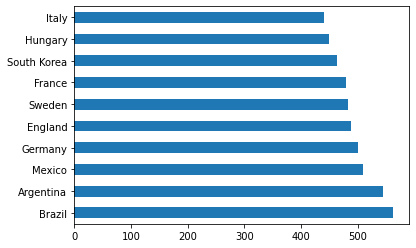

In [ ]:
# Horizontal Bar chart for the address lines
y = Fifa_results['home_team'].value_counts().nlargest(10)
y.plot(kind='barh')
plt.show()

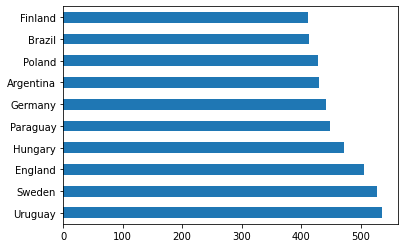

In [ ]:
# Horizontal Bar chart for the address lines
y = Fifa_results['away_team'].value_counts().nlargest(10)
y.plot(kind='barh')
plt.show()

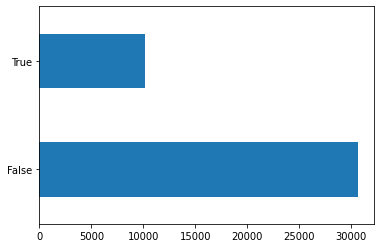

In [ ]:
# Horizontal Bar chart for the address lines
y = Fifa_results['neutral'].value_counts().nlargest(10)
y.plot(kind='barh')
plt.show()

##pie charts

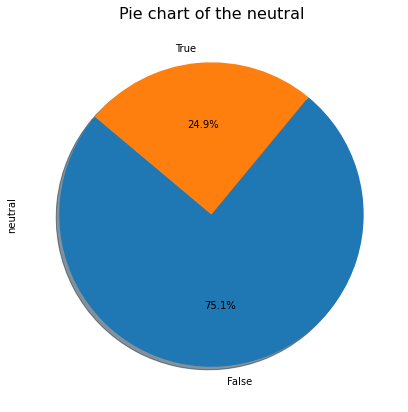

In [ ]:
# Pie chart for the deal size
Fifa_results['neutral'].value_counts(sort=False).plot.pie(autopct = '%1.1f%%', shadow = True, startangle = 140, figsize = (7,7))
plt.title('Pie chart of the neutral',fontsize=16)
plt.show()

#7.0 Multicollinearity

In [ ]:
# Let's display the correlations between the variables
correlations = Fifa_results.corr()

correlations

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
rank,1.000000,-0.343806,-0.725829,-0.051719,-0.339931,-0.339931,-0.315359,-0.315358,-0.309038,-0.309037,-0.305259,-0.305259,-0.006569,-0.013709
total_points,-0.343806,1.000000,0.531626,0.019459,0.973089,0.973089,0.931486,0.931486,0.915520,0.915520,0.906238,0.906239,0.002231,0.004485
previous_points,-0.725829,0.531626,1.000000,-0.028783,0.519410,0.519410,0.495404,0.495404,0.483039,0.483038,0.476186,0.476186,-0.069557,-0.071836
rank_change,-0.051719,0.019459,-0.028783,1.000000,0.046161,0.046161,-0.015765,-0.015765,-0.004999,-0.004999,-0.000617,-0.000617,-0.011641,0.007927
cur_year_avg,-0.339931,0.973089,0.519410,0.046161,1.000000,1.000000,0.843101,0.843102,0.846353,0.846353,0.839536,0.839536,0.002100,0.006115
cur_year_avg_weighted,-0.339931,0.973089,0.519410,0.046161,1.000000,1.000000,0.843101,0.843102,0.846353,0.846353,0.839536,0.839536,0.002100,0.006115
last_year_avg,-0.315359,0.931486,0.495404,-0.015765,0.843101,0.843101,1.000000,1.000000,0.840037,0.840037,0.849696,0.849697,0.000377,0.003790
last_year_avg_weighted,-0.315358,0.931486,0.495404,-0.015765,0.843102,0.843102,1.000000,1.000000,0.840037,0.840037,0.849697,0.849697,0.000377,0.003790
two_year_ago_avg,-0.309038,0.915520,0.483039,-0.004999,0.846353,0.846353,0.840037,0.840037,1.000000,1.000000,0.844669,0.844669,0.004233,0.000956
two_year_ago_weighted,-0.309037,0.915520,0.483038,-0.004999,0.846353,0.846353,0.840037,0.840037,1.000000,1.000000,0.844669,0.844669,0.004233,0.000956


In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
rank,2.184979e+00,1.719126e+01,1.707579e+00,1.684852e-01,9.716217e+11,-9.696948e+11,4.397682e+02,-4.444764e+02,-2.987189e+04,2.983349e+04,7.040805e+03,-7.032229e+03,1.695171e-01,1.655725e-01
total_points,1.053980e+01,3.881805e+05,1.268781e+01,-5.173552e+00,-1.459800e+14,1.459789e+14,-6.552206e+04,-3.708610e+04,4.351314e+06,-4.412413e+06,-1.005848e+06,9.654779e+05,1.930931e+01,4.645568e+01
previous_points,1.733568e+00,-7.351067e+00,2.739657e+00,1.753917e-01,-2.356832e+12,2.356821e+12,-1.041406e+03,1.043190e+03,7.326961e+04,-7.326902e+04,-1.666360e+04,1.666439e+04,2.147436e-01,2.776225e-01
rank_change,1.714354e-01,-9.693890e+00,1.841778e-01,1.026969e+00,-5.956288e+11,5.954896e+11,-2.555762e+02,2.583059e+02,1.847887e+04,-1.848074e+04,-4.089642e+03,4.091949e+03,2.092854e-02,1.695399e-02
cur_year_avg,-3.189089e+11,2.270359e+14,7.370910e+10,1.161671e+11,2.616547e+25,-2.616547e+25,2.451136e+15,-2.512245e+15,-8.148949e+17,8.148601e+17,1.833632e+17,-1.833867e+17,2.915839e+11,-2.300643e+11
cur_year_avg_weighted,3.189089e+11,-2.270359e+14,-7.370910e+10,-1.161671e+11,-2.616547e+25,2.616547e+25,-2.451136e+15,2.512245e+15,8.148949e+17,-8.148601e+17,-1.833632e+17,1.833867e+17,-2.915839e+11,2.300643e+11
last_year_avg,-5.349860e+04,3.828298e+07,1.162510e+04,1.941494e+04,4.418018e+18,-4.418018e+18,1.934015e+09,-1.944322e+09,-1.376015e+11,1.375956e+11,3.094934e+10,-3.095332e+10,4.913045e+04,-3.890695e+04
last_year_avg_weighted,5.349580e+04,-3.838563e+07,-1.162872e+04,-1.941346e+04,-4.417984e+18,4.417984e+18,-1.934000e+09,1.944334e+09,1.376005e+11,-1.375946e+11,-3.094911e+10,3.095309e+10,-4.913562e+04,3.889469e+04
two_year_ago_avg,6.588388e+02,-3.829657e+05,-1.921781e+02,-1.669140e+02,-2.166283e+16,2.166283e+16,-9.195297e+06,9.298391e+06,1.424719e+09,-1.424660e+09,-1.471700e+08,1.472095e+08,-4.876138e+02,3.817419e+02
two_year_ago_weighted,-6.605141e+02,3.219990e+05,1.900622e+02,1.677951e+02,2.168470e+16,-2.168470e+16,9.205139e+06,-9.292118e+06,-1.425370e+09,1.425321e+09,1.473208e+08,-1.473539e+08,4.845516e+02,-3.890266e+02


In [ ]:
import seaborn as sb

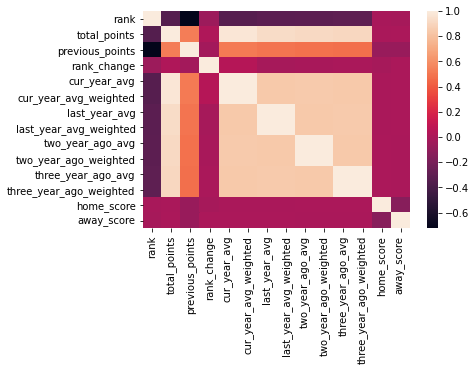

In [ ]:
sb.heatmap(Fifa_results.corr()) 

In [ ]:
#finding the inverse of the correlation matrix we got
inver_matrices=pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
inver_matrices

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
rank,2.184979e+00,1.719126e+01,1.707579e+00,1.684852e-01,9.716217e+11,-9.696948e+11,4.397682e+02,-4.444764e+02,-2.987189e+04,2.983349e+04,7.040805e+03,-7.032229e+03,1.695171e-01,1.655725e-01
total_points,1.053980e+01,3.881805e+05,1.268781e+01,-5.173552e+00,-1.459800e+14,1.459789e+14,-6.552206e+04,-3.708610e+04,4.351314e+06,-4.412413e+06,-1.005848e+06,9.654779e+05,1.930931e+01,4.645568e+01
previous_points,1.733568e+00,-7.351067e+00,2.739657e+00,1.753917e-01,-2.356832e+12,2.356821e+12,-1.041406e+03,1.043190e+03,7.326961e+04,-7.326902e+04,-1.666360e+04,1.666439e+04,2.147436e-01,2.776225e-01
rank_change,1.714354e-01,-9.693890e+00,1.841778e-01,1.026969e+00,-5.956288e+11,5.954896e+11,-2.555762e+02,2.583059e+02,1.847887e+04,-1.848074e+04,-4.089642e+03,4.091949e+03,2.092854e-02,1.695399e-02
cur_year_avg,-3.189089e+11,2.270359e+14,7.370910e+10,1.161671e+11,2.616547e+25,-2.616547e+25,2.451136e+15,-2.512245e+15,-8.148949e+17,8.148601e+17,1.833632e+17,-1.833867e+17,2.915839e+11,-2.300643e+11
cur_year_avg_weighted,3.189089e+11,-2.270359e+14,-7.370910e+10,-1.161671e+11,-2.616547e+25,2.616547e+25,-2.451136e+15,2.512245e+15,8.148949e+17,-8.148601e+17,-1.833632e+17,1.833867e+17,-2.915839e+11,2.300643e+11
last_year_avg,-5.349860e+04,3.828298e+07,1.162510e+04,1.941494e+04,4.418018e+18,-4.418018e+18,1.934015e+09,-1.944322e+09,-1.376015e+11,1.375956e+11,3.094934e+10,-3.095332e+10,4.913045e+04,-3.890695e+04
last_year_avg_weighted,5.349580e+04,-3.838563e+07,-1.162872e+04,-1.941346e+04,-4.417984e+18,4.417984e+18,-1.934000e+09,1.944334e+09,1.376005e+11,-1.375946e+11,-3.094911e+10,3.095309e+10,-4.913562e+04,3.889469e+04
two_year_ago_avg,6.588388e+02,-3.829657e+05,-1.921781e+02,-1.669140e+02,-2.166283e+16,2.166283e+16,-9.195297e+06,9.298391e+06,1.424719e+09,-1.424660e+09,-1.471700e+08,1.472095e+08,-4.876138e+02,3.817419e+02
two_year_ago_weighted,-6.605141e+02,3.219990e+05,1.900622e+02,1.677951e+02,2.168470e+16,-2.168470e+16,9.205139e+06,-9.292118e+06,-1.425370e+09,1.425321e+09,1.473208e+08,-1.473539e+08,4.845516e+02,-3.890266e+02


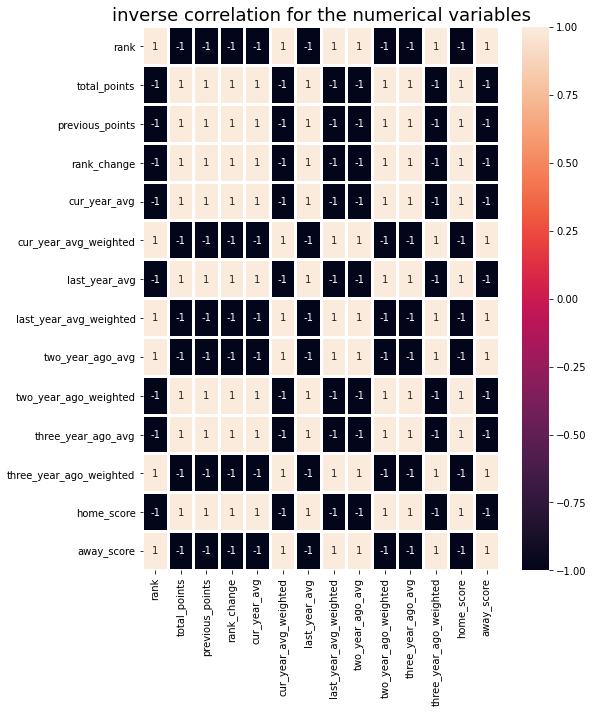

In [ ]:
corr = inver_matrices.corr()
plt.figure(figsize=(8,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=2.0,annot=True)
plt.title('inverse correlation for the numerical variables',fontsize=18)
plt.show()

In [ ]:
Fifa_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   total_points             57793 non-null  float64
 2   previous_points          57793 non-null  int64  
 3   rank_change              57793 non-null  int64  
 4   cur_year_avg             57793 non-null  float64
 5   cur_year_avg_weighted    57793 non-null  float64
 6   last_year_avg            57793 non-null  float64
 7   last_year_avg_weighted   57793 non-null  float64
 8   two_year_ago_avg         57793 non-null  float64
 9   two_year_ago_weighted    57793 non-null  float64
 10  three_year_ago_avg       57793 non-null  float64
 11  three_year_ago_weighted  57793 non-null  float64
 12  confederation            57793 non-null  object 
 13  rank_date                57793 non-null  object 
 14  date                  

In [ ]:
#droping null values in our data
Fifa_result=Fifa_results.dropna()

In [ ]:
Fifa_result.drop(["confederation","rank_date","date","home_team","away_team","tournament","city"],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Fifa_result.head()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score,neutral
0,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,2,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,False
2,3,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,False
3,4,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,False
4,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,False


In [ ]:
Fifa_result.neutral.replace(('True', 'False'), (1, 0), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#changing the data types from floats to integers
Fifa_results_data=Fifa_result. astype(int)

In [ ]:
Fifa_results_data.head(1)

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score,neutral
0,1,0,57,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting our dataset
#
X = Fifa_results_data.drop("home_score",axis=1)
y = Fifa_results_data["home_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=10)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[  25, 2887,    3,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  16, 3620,    8,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  13, 2649,    5,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   8, 1446,    5,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,  746,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   4,  384,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  186,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],

In [ ]:
# Splitting our dataset
#
X = Fifa_results_data.drop("away_score",axis=1)
y = Fifa_results_data["away_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[4516,   41,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [3925,   40,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [2087,   17,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 878,   12,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 393,    8,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 146,    4,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  80,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  45,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],


In [ ]:
# Let's display the correlations between the variables
correlations = Fifa_results_data.corr()

correlations

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score,neutral
rank,1.000000,-0.072571,-0.645624,-0.049728,-0.068952,-0.068952,-0.073410,-0.073433,-0.070084,-0.070183,-0.062279,-0.062516,-0.006569,-0.013709,-0.001556
total_points,-0.072571,1.000000,0.117941,0.007164,0.975222,0.975222,0.945971,0.945776,0.945706,0.945496,0.935569,0.935257,0.002234,0.004485,0.038458
previous_points,-0.645624,0.117941,1.000000,-0.022447,0.111032,0.111032,0.120122,0.120149,0.112530,0.112617,0.106157,0.106374,-0.069557,-0.071836,0.060493
rank_change,-0.049728,0.007164,-0.022447,1.000000,0.014894,0.014894,-0.004089,-0.004118,0.005174,0.005162,-0.001058,-0.001068,-0.011641,0.007927,0.008335
cur_year_avg,-0.068952,0.975222,0.111032,0.014894,1.000000,1.000000,0.864390,0.864096,0.885784,0.885473,0.881271,0.880656,0.002112,0.006116,0.040680
cur_year_avg_weighted,-0.068952,0.975222,0.111032,0.014894,1.000000,1.000000,0.864390,0.864096,0.885784,0.885473,0.881271,0.880656,0.002112,0.006116,0.040680
last_year_avg,-0.073410,0.945971,0.120122,-0.004089,0.864390,0.864390,1.000000,0.999998,0.897482,0.897403,0.889867,0.890018,0.000376,0.003782,0.031693
last_year_avg_weighted,-0.073433,0.945776,0.120149,-0.004118,0.864096,0.864096,0.999998,1.000000,0.897346,0.897268,0.889643,0.889797,0.000375,0.003761,0.031657
two_year_ago_avg,-0.070084,0.945706,0.112530,0.005174,0.885784,0.885784,0.897482,0.897346,1.000000,0.999993,0.893863,0.893631,0.004236,0.000947,0.035258
two_year_ago_weighted,-0.070183,0.945496,0.112617,0.005162,0.885473,0.885473,0.897403,0.897268,0.999993,1.000000,0.893581,0.893354,0.004239,0.000958,0.035192


#8.0 Residual plots and heteroskedasticity testing

Let's start by creating a model based on our revised set of independent variables above, then displaying the residual plot for it.

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = correlations.values
y = correlations['home_score'].values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=2, random_state=10)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.001580681029483708

Our mean  is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.15%

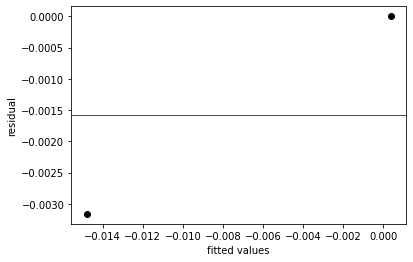

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

From the our visualisation we can see that the residals are far from the mean but close to zero  hence there are no possible patterns

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous')




1.2241126230089
the variances are homogeneous
